In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
path = kagglehub.dataset_download("gauravduttakiit/smoker-status-prediction")
smokers = pd.read_csv(path + '/train_dataset.csv')

In [ ]:
smokers

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
smokers.isna().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [ ]:
smokers.duplicated().sum()

5517

In [ ]:
smokers.drop_duplicates(keep='first', inplace=True)

## EDA (Exploratory Data Analysis)
* Feature Engineering (Create Features from existing ones)
* Eliminate characateristics that are highly corelated with others. Keep ones that have high correlation with the target (smoker)
* Eliminate columns with low variance
* ....

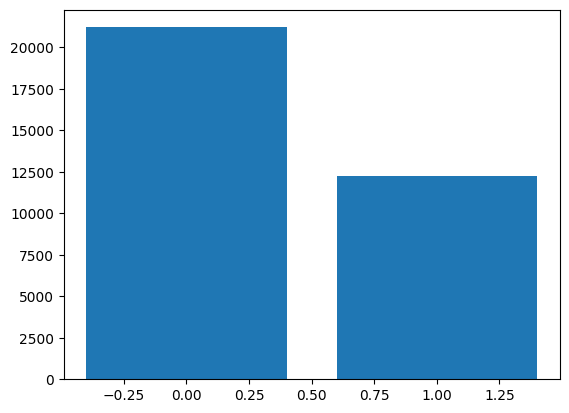

In [ ]:
plt.bar(smokers.smoking.value_counts().index, smokers.smoking.value_counts().values)
plt.show()
## Aplica algoritmi de generare de date sintetice (SMOTE, ADASYN)
## Se pot elimina date din clasa majoritara care sunt foarte similare intre ele

In [ ]:
from sklearn.model_selection import train_test_split
X = smokers.drop(columns=['smoking'])
y = smokers.smoking

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

params = {
    'booster': 'gbtree',
    'learning_rate': 0.01,
    'max_depth': 7,
    'lambda': 0.2,
    'alpha': 0.7,
    'scale_pos_weight': 1.2,
    'max_leaves': 73,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'n_estimators': 100
}

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [ ]:
y_pred_proba

array([0.5245154 , 0.49781495, 0.6264145 , ..., 0.6330202 , 0.24611929,
       0.53980196], dtype=float32)

In [ ]:
y_pred = [np.round(x) for x in y_pred_proba]

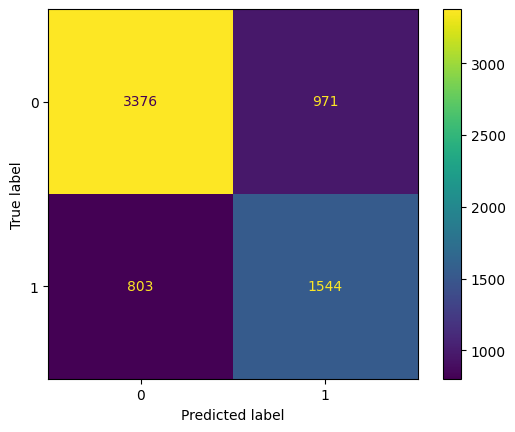

Accuracy:  0.7349865551239916
Precision:  0.6139165009940358
Recall:  0.657861099275671
F1:  0.6351295763060469


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
disp.plot()
plt.show()

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)


In [ ]:
from lightgbm import LGBMClassifier

params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': 9,
    'num_leaves': 117,
    'min_data_in_leaf': 19,
    'num_iterations': 30,

}

lgb_model = LGBMClassifier(**params)
lgb_model.fit(X_train, y_train)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromSc

In [ ]:
y_pred_lgb = [np.round(x) for x in y_pred_proba]

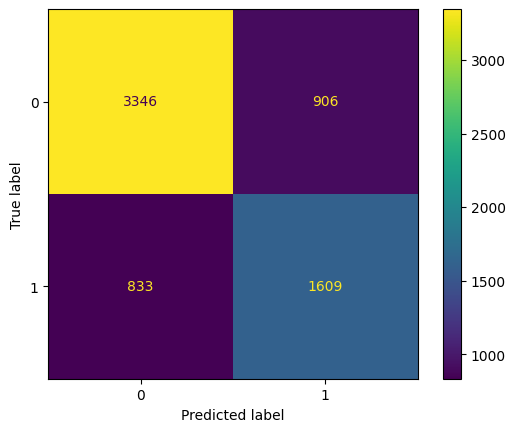

Accuracy:  0.7402151180161338
Precision:  0.6397614314115309
Recall:  0.6588861588861589
F1:  0.6491829735727255


In [ ]:
accuracy = accuracy_score(y_pred_lgb, y_test)
recall = recall_score(y_pred_lgb, y_test)
precision = precision_score(y_pred_lgb, y_test)
f1 = f1_score(y_pred_lgb, y_test)

cm = confusion_matrix(y_pred_lgb, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
disp.plot()
plt.show()

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import optuna
import lightgbm as lgb


def objective(trial):
  dtrain = lgb.Dataset(X_train, label=y_train)
  params = {
      "objective": "binary",
      'boosting': 'gbdt',
      "lambda_l1": trial.suggest_categorical("lambda_l1", [0.001, 0.01, 0.03, 0.05]),
      "lambda_l2": trial.suggest_float("lambda_l2", 0.001, 2),
      "num_leaves": trial.suggest_int("num_leaves", 73, 127),
      "max_depth": trial.suggest_int("max_depth", 7, 11),
      "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 13, 41)
  }

  gbm = lgb.train(params, dtrain)
  preds = gbm.predict(X_test)
  pred_labels = np.rint(preds)
  f1 = f1_score(y_test, pred_labels)
  return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 100)

print("Best trial: ")
trial = study.best_trialss

print("Value: {}".format(trial.value))

for key, value in trial.params.items():
  print("   {}: {}".format(key, value))




[I 2025-02-17 17:58:45,484] A new study created in memory with name: no-name-55e44064-f631-467c-88aa-81d2e5c0875a


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:46,418] Trial 0 finished with value: 0.6440814680379109 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 1.1667057046321683, 'num_leaves': 95, 'max_depth': 10, 'min_data_in_leaf': 25}. Best is trial 0 with value: 0.6440814680379109.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:49,038] Trial 1 finished with value: 0.6493822159205995 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.24377696559507564, 'num_leaves': 126, 'max_depth': 9, 'min_data_in_leaf': 37}. Best is trial 1 with value: 0.6493822159205995.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-02-17 17:58:50,143] Trial 2 finished with value: 0.6439440048691418 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 1.8595683760886257, 'num_leaves': 102, 'max_depth': 9, 'min_data_in_leaf': 34}. Best is trial 1 with value: 0.6493822159205995.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:58:51,212] Trial 3 finished with value: 0.6440539436044136 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 1.650955520059935, 'num_leaves': 117, 'max_depth': 11, 'min_data_in_leaf': 23}. Best is trial 1 with value: 0.6493822159205995.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:58:51,954] Trial 4 finished with value: 0.6495864434133548 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.8202605488908546, 'num_leaves': 73, 'max_depth': 7, 'min_data_in_leaf': 33}. Best is trial 4 with value: 0.6495864434133548.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:52,795] Trial 5 finished with value: 0.6516673362796304 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.7021534313967082, 'num_leaves': 116, 'max_depth': 7, 'min_data_in_leaf': 16}. Best is trial 5 with value: 0.6516673362796304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:58:53,758] Trial 6 finished with value: 0.6441568944601699 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 1.74289755975806, 'num_leaves': 74, 'max_depth': 8, 'min_data_in_leaf': 13}. Best is trial 5 with value: 0.6516673362796304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:54,649] Trial 7 finished with value: 0.6437994722955145 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 1.1490350439635681, 'num_leaves': 84, 'max_depth': 10, 'min_data_in_leaf': 34}. Best is trial 5 with value: 0.6516673362796304.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:58:55,431] Trial 8 finished with value: 0.6516220028208745 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.032746516679220745, 'num_leaves': 88, 'max_depth': 7, 'min_data_in_leaf': 39}. Best is trial 5 with value: 0.6516673362796304.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:56,313] Trial 9 finished with value: 0.651417004048583 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 1.3589993114025414, 'num_leaves': 107, 'max_depth': 7, 'min_data_in_leaf': 27}. Best is trial 5 with value: 0.6516673362796304.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002564 seco

[I 2025-02-17 17:58:57,260] Trial 10 finished with value: 0.6453182002432104 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.9659909927145174, 'num_leaves': 113, 'max_depth': 8, 'min_data_in_leaf': 14}. Best is trial 5 with value: 0.6516673362796304.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:58:58,116] Trial 11 finished with value: 0.6525509175236943 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.30077631345008515, 'num_leaves': 91, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromS

[I 2025-02-17 17:58:59,022] Trial 12 finished with value: 0.6416464891041163 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.6331481728920192, 'num_leaves': 94, 'max_depth': 8, 'min_data_in_leaf': 19}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:00,815] Trial 13 finished with value: 0.6519292604501608 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.48274541865320475, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:02,741] Trial 14 finished with value: 0.646073087017969 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.4589873127346946, 'num_leaves': 127, 'max_depth': 8, 'min_data_in_leaf': 20}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:03,631] Trial 15 finished with value: 0.6463463867581752 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.4081074594550471, 'num_leaves': 82, 'max_depth': 7, 'min_data_in_leaf': 20}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:04,561] Trial 16 finished with value: 0.6475111290975314 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 0.023170648035486352, 'num_leaves': 103, 'max_depth': 8, 'min_data_in_leaf': 29}. Best is trial 11 with value: 0.6525509175236943.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-17 17:59:05,486] Trial 17 finished with value: 0.6462474645030426 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 0.7671723872304906, 'num_leaves': 92, 'max_depth': 9, 'min_data_in_leaf': 17}. Best is trial 11 with value: 0.6525509175236943.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:06,358] Trial 18 finished with value: 0.6526994359387591 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.27501309973311755, 'num_leaves': 108, 'max_depth': 7, 'min_data_in_leaf': 23}. Best is trial 18 with value: 0.6526994359387591.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:07,396] Trial 19 finished with value: 0.6483760338914666 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.18580828849200065, 'num_leaves': 108, 'max_depth': 10, 'min_data_in_leaf': 23}. Best is trial 18 with value: 0.6526994359387591.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:08,332] Trial 20 finished with value: 0.6376694315193202 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.8786077406537542, 'num_leaves': 98, 'max_depth': 9, 'min_data_in_leaf': 30}. Best is trial 18 with value: 0.6526994359387591.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:09,184] Trial 21 finished with value: 0.6487903225806452 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.5366097936312447, 'num_leaves': 123, 'max_depth': 7, 'min_data_in_leaf': 22}. Best is trial 18 with value: 0.6526994359387591.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:10,071] Trial 22 finished with value: 0.6494969818913481 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.27635546927418014, 'num_leaves': 108, 'max_depth': 7, 'min_data_in_leaf': 17}. Best is trial 18 with value: 0.6526994359387591.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [

[I 2025-02-17 17:59:11,021] Trial 23 finished with value: 0.6460798074994987 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.6452954839630414, 'num_leaves': 118, 'max_depth': 8, 'min_data_in_leaf': 26}. Best is trial 18 with value: 0.6526994359387591.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-17 17:59:11,877] Trial 24 finished with value: 0.6532744073925271 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.37498228591359634, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 22}. Best is trial 24 with value: 0.6532744073925271.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-02-17 17:59:13,692] Trial 25 finished with value: 0.6468446601941747 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.32186983687382936, 'num_leaves': 79, 'max_depth': 8, 'min_data_in_leaf': 24}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:15,518] Trial 26 finished with value: 0.6509661835748792 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.15090319351681353, 'num_leaves': 91, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 24 with value: 0.6532744073925271.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-17 17:59:16,329] Trial 27 finished with value: 0.6482897384305835 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.6546087618542555, 'num_leaves': 87, 'max_depth': 7, 'min_data_in_leaf': 29}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:17,168] Trial 28 finished with value: 0.6422501011736139 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.3605084536645851, 'num_leaves': 77, 'max_depth': 8, 'min_data_in_leaf': 16}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2025-02-17 17:59:18,165] Trial 29 finished with value: 0.6459475929311396 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 1.0078745207544464, 'num_leaves': 97, 'max_depth': 11, 'min_data_in_leaf': 25}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:19,008] Trial 30 finished with value: 0.6513131313131313 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 1.3913139933411185, 'num_leaves': 83, 'max_depth': 7, 'min_data_in_leaf': 18}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:19,892] Trial 31 finished with value: 0.6487462387161484 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.5191698274001967, 'num_leaves': 121, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:20,801] Trial 32 finished with value: 0.6481033091202583 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 0.24208107968703646, 'num_leaves': 112, 'max_depth': 7, 'min_data_in_leaf': 15}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:21,771] Trial 33 finished with value: 0.6510500807754442 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.10280766871299285, 'num_leaves': 101, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:22,673] Trial 34 finished with value: 0.6497873202349606 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.39841115761337687, 'num_leaves': 87, 'max_depth': 9, 'min_data_in_leaf': 24}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2025-02-17 17:59:23,610] Trial 35 finished with value: 0.6398869600322972 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.5537948938666913, 'num_leaves': 105, 'max_depth': 8, 'min_data_in_leaf': 22}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-02-17 17:59:24,459] Trial 36 finished with value: 0.6515763945028294 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.7338060662349988, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 18}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:25,460] Trial 37 finished with value: 0.6444981862152358 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 0.9081131642793712, 'num_leaves': 113, 'max_depth': 7, 'min_data_in_leaf': 26}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:28,345] Trial 38 finished with value: 0.6446014127144298 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.2542245360440508, 'num_leaves': 123, 'max_depth': 8, 'min_data_in_leaf': 23}. Best is trial 24 with value: 0.6532744073925271.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-17 17:59:29,206] Trial 39 finished with value: 0.6484091824405961 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.12806404587241838, 'num_leaves': 77, 'max_depth': 7, 'min_data_in_leaf': 13}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:30,121] Trial 40 finished with value: 0.6478587375685001 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 0.4152240647315094, 'num_leaves': 91, 'max_depth': 10, 'min_data_in_leaf': 41}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:31,017] Trial 41 finished with value: 0.6456408196062676 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.4521405780065832, 'num_leaves': 117, 'max_depth': 7, 'min_data_in_leaf': 15}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:31,905] Trial 42 finished with value: 0.6497482376636455 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.533464353303152, 'num_leaves': 111, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:32,810] Trial 43 finished with value: 0.6469155844155844 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.0104638835639186, 'num_leaves': 119, 'max_depth': 7, 'min_data_in_leaf': 16}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:33,808] Trial 44 finished with value: 0.6474528110412016 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.1675170881647723, 'num_leaves': 115, 'max_depth': 8, 'min_data_in_leaf': 20}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:34,670] Trial 45 finished with value: 0.648626817447496 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 1.7596787693923819, 'num_leaves': 124, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 24 with value: 0.6532744073925271.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-02-17 17:59:35,637] Trial 46 finished with value: 0.6494762288477035 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.919080441073674, 'num_leaves': 110, 'max_depth': 8, 'min_data_in_leaf': 18}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 17:59:36,539] Trial 47 finished with value: 0.6468222043443282 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 1.2369426427311754, 'num_leaves': 104, 'max_depth': 7, 'min_data_in_leaf': 14}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:37,571] Trial 48 finished with value: 0.6370852839405658 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.4836035776373492, 'num_leaves': 99, 'max_depth': 11, 'min_data_in_leaf': 22}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from scor

[I 2025-02-17 17:59:38,682] Trial 49 finished with value: 0.6479499091092709 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.632003785029389, 'num_leaves': 74, 'max_depth': 8, 'min_data_in_leaf': 32}. Best is trial 24 with value: 0.6532744073925271.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:41,244] Trial 50 finished with value: 0.654728370221328 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.057906709819630864, 'num_leaves': 126, 'max_depth': 7, 'min_data_in_leaf': 27}. Best is trial 50 with value: 0.654728370221328.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006379 secon

[I 2025-02-17 17:59:42,124] Trial 51 finished with value: 0.6458375327554928 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.0178023590160869, 'num_leaves': 126, 'max_depth': 7, 'min_data_in_leaf': 28}. Best is trial 50 with value: 0.654728370221328.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:42,988] Trial 52 finished with value: 0.6525080906148867 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.2084113816252363, 'num_leaves': 120, 'max_depth': 7, 'min_data_in_leaf': 25}. Best is trial 50 with value: 0.654728370221328.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromS

[I 2025-02-17 17:59:43,858] Trial 53 finished with value: 0.6454343882281798 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.20087845622512768, 'num_leaves': 126, 'max_depth': 7, 'min_data_in_leaf': 27}. Best is trial 50 with value: 0.654728370221328.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start trainin

[I 2025-02-17 17:59:44,722] Trial 54 finished with value: 0.6496350364963503 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.09185494756111626, 'num_leaves': 122, 'max_depth': 7, 'min_data_in_leaf': 25}. Best is trial 50 with value: 0.654728370221328.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

[I 2025-02-17 17:59:45,590] Trial 55 finished with value: 0.6559291322730018 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.3232548533204743, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 24}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start trainin

[I 2025-02-17 17:59:46,472] Trial 56 finished with value: 0.6502024291497975 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.2993396187877752, 'num_leaves': 120, 'max_depth': 7, 'min_data_in_leaf': 31}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:47,417] Trial 57 finished with value: 0.643855031382871 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.19415526718843135, 'num_leaves': 124, 'max_depth': 8, 'min_data_in_leaf': 35}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:48,296] Trial 58 finished with value: 0.65 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.07853645013597332, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 24}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start trainin

[I 2025-02-17 17:59:49,183] Trial 59 finished with value: 0.6498282481309355 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.3418073415858762, 'num_leaves': 95, 'max_depth': 7, 'min_data_in_leaf': 26}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2025-02-17 17:59:50,174] Trial 60 finished with value: 0.645421540943929 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.2335927818543178, 'num_leaves': 127, 'max_depth': 8, 'min_data_in_leaf': 25}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:51,262] Trial 61 finished with value: 0.6470232088799193 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.4633313284484153, 'num_leaves': 125, 'max_depth': 7, 'min_data_in_leaf': 28}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-17 17:59:53,863] Trial 62 finished with value: 0.6507968529352431 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.32983893179223356, 'num_leaves': 115, 'max_depth': 7, 'min_data_in_leaf': 23}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 17:59:54,785] Trial 63 finished with value: 0.6464768826973551 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.5758816795175807, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 23}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:55,686] Trial 64 finished with value: 0.6501110438118313 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 0.15541442339403524, 'num_leaves': 121, 'max_depth': 7, 'min_data_in_leaf': 20}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Foun

[I 2025-02-17 17:59:56,638] Trial 65 finished with value: 0.6500201369311317 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.005952204395832383, 'num_leaves': 119, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 17:59:57,511] Trial 66 finished with value: 0.6489211534583585 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 0.4435948725026322, 'num_leaves': 124, 'max_depth': 7, 'min_data_in_leaf': 28}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[I 2025-02-17 17:59:58,422] Trial 67 finished with value: 0.6459175424413904 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.3816239118080891, 'num_leaves': 122, 'max_depth': 7, 'min_data_in_leaf': 24}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 17:59:59,297] Trial 68 finished with value: 0.6473313192346425 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.286570479481726, 'num_leaves': 89, 'max_depth': 7, 'min_data_in_leaf': 22}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:00,235] Trial 69 finished with value: 0.6464155528554071 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 0.601976929680038, 'num_leaves': 97, 'max_depth': 8, 'min_data_in_leaf': 26}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-02-17 18:00:01,294] Trial 70 finished with value: 0.6462474645030426 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.7175694603365683, 'num_leaves': 107, 'max_depth': 10, 'min_data_in_leaf': 19}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:02,218] Trial 71 finished with value: 0.6430738119312437 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.07313076466601154, 'num_leaves': 117, 'max_depth': 7, 'min_data_in_leaf': 17}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 18:00:03,116] Trial 72 finished with value: 0.6420753952168626 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.17573455777307967, 'num_leaves': 115, 'max_depth': 7, 'min_data_in_leaf': 27}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2025-02-17 18:00:04,197] Trial 73 finished with value: 0.6492567296102852 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.5049305337836996, 'num_leaves': 125, 'max_depth': 7, 'min_data_in_leaf': 16}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:06,914] Trial 74 finished with value: 0.6461787302871007 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.36745786882463405, 'num_leaves': 121, 'max_depth': 7, 'min_data_in_leaf': 20}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:07,798] Trial 75 finished with value: 0.6477961989486454 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 0.2464980480786458, 'num_leaves': 109, 'max_depth': 7, 'min_data_in_leaf': 25}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-17 18:00:08,680] Trial 76 finished with value: 0.6491051679066961 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.142774703410541, 'num_leaves': 117, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train s

[I 2025-02-17 18:00:09,629] Trial 77 finished with value: 0.6485939712725066 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.2828960531148047, 'num_leaves': 106, 'max_depth': 7, 'min_data_in_leaf': 23}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 18:00:10,717] Trial 78 finished with value: 0.6386178861788618 and parameters: {'lambda_l1': 0.1, 'lambda_l2': 0.41466596850599213, 'num_leaves': 123, 'max_depth': 9, 'min_data_in_leaf': 17}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:11,602] Trial 79 finished with value: 0.6494762288477035 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.6790086205573344, 'num_leaves': 102, 'max_depth': 7, 'min_data_in_leaf': 18}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, 

[I 2025-02-17 18:00:12,586] Trial 80 finished with value: 0.6465256797583081 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.8311232618393436, 'num_leaves': 119, 'max_depth': 8, 'min_data_in_leaf': 30}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Nu

[I 2025-02-17 18:00:13,460] Trial 81 finished with value: 0.645824929407019 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.06222746018066452, 'num_leaves': 87, 'max_depth': 7, 'min_data_in_leaf': 36}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:14,356] Trial 82 finished with value: 0.6509090909090909 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.2091577118915072, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 24}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-ch

[I 2025-02-17 18:00:15,205] Trial 83 finished with value: 0.6515546639919759 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.04736411071066031, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 39}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train s

[I 2025-02-17 18:00:16,091] Trial 84 finished with value: 0.6425247825207364 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.13189276740099293, 'num_leaves': 92, 'max_depth': 7, 'min_data_in_leaf': 22}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:17,028] Trial 85 finished with value: 0.6503736618864876 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.335633865576477, 'num_leaves': 77, 'max_depth': 7, 'min_data_in_leaf': 38}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from sco

[I 2025-02-17 18:00:19,726] Trial 86 finished with value: 0.6487360970677452 and parameters: {'lambda_l1': 0.3, 'lambda_l2': 1.7718286432305432, 'num_leaves': 113, 'max_depth': 7, 'min_data_in_leaf': 15}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:20,599] Trial 87 finished with value: 0.65 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 1.0529217457809326, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 41}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train 

[I 2025-02-17 18:00:21,524] Trial 88 finished with value: 0.651453957996769 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 1.3271076112152262, 'num_leaves': 89, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[I 2025-02-17 18:00:22,511] Trial 89 finished with value: 0.6467862180132984 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.10230316538066259, 'num_leaves': 94, 'max_depth': 8, 'min_data_in_leaf': 14}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:23,413] Trial 90 finished with value: 0.6465256797583081 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 0.2438999093810027, 'num_leaves': 126, 'max_depth': 7, 'min_data_in_leaf': 29}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773,

[I 2025-02-17 18:00:24,277] Trial 91 finished with value: 0.6508447304907482 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.914499062759428, 'num_leaves': 78, 'max_depth': 7, 'min_data_in_leaf': 18}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:25,167] Trial 92 finished with value: 0.6449787835926449 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.4343709901814184, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 16}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:26,093] Trial 93 finished with value: 0.6437664174580724 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.5309040746998477, 'num_leaves': 80, 'max_depth': 7, 'min_data_in_leaf': 25}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start trainin

[I 2025-02-17 18:00:27,026] Trial 94 finished with value: 0.6451612903225806 and parameters: {'lambda_l1': 0.03, 'lambda_l2': 0.30463870850236424, 'num_leaves': 84, 'max_depth': 7, 'min_data_in_leaf': 19}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-02-17 18:00:27,916] Trial 95 finished with value: 0.6500201369311317 and parameters: {'lambda_l1': 0.15, 'lambda_l2': 0.1985462887841533, 'num_leaves': 83, 'max_depth': 7, 'min_data_in_leaf': 17}. Best is trial 55 with value: 0.6559291322730018.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-02-17 18:00:28,851] Trial 96 finished with value: 0.6466680088584659 and parameters: {'lambda_l1': 0.05, 'lambda_l2': 0.38120376212006113, 'num_leaves': 125, 'max_depth': 7, 'min_data_in_leaf': 21}. Best is trial 55 with value: 0.6559291322730018.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Fou

[I 2025-02-17 18:00:29,816] Trial 97 finished with value: 0.65674643072592 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 1.9774266205466673, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 20}. Best is trial 97 with value: 0.65674643072592.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-17 18:00:32,630] Trial 98 finished with value: 0.6529873264936632 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 1.9420618601069894, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 20}. Best is trial 97 with value: 0.65674643072592.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9743, number of negative: 17030
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26773, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363911 -> initscore=-0.558427
[LightGBM] [Info] Start training from score -0.558427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2025-02-17 18:00:33,592] Trial 99 finished with value: 0.6490306946688207 and parameters: {'lambda_l1': 0.01, 'lambda_l2': 1.9660988336995817, 'num_leaves': 127, 'max_depth': 7, 'min_data_in_leaf': 22}. Best is trial 97 with value: 0.65674643072592.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
{}